In [41]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("./DATA/default of credit card clients.csv", skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
prm = 0.12

In [47]:
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [49]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [51]:
payst1 = [ 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
billsd1 = [ 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ] 
paysd1 = [ 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ] 

In [53]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [55]:
hb_cols1 = ['hb1', 'hb1', 'hb3', 'hb4', 'hb5', 'hb6']

j=0
for c in payst1:
    datat1 = df[c].values
    datapd1 = df[paysd1[j]]
    databd1 = df[billsd1[j]]
    v_col = []
    k = 0
    for val1 in datat1:
        if ((val1<=0) and (datapd1[k]>=prm*databd1[k])) :
        #if val1<=0:
            v_col.append(1)
        else:
            v_col.append(0)
        k += 1
    df[hb_cols1[j]] = v_col
    print(df[hb_cols1[j]].value_counts()/30000)
    j += 1

hb1
0    0.673167
1    0.326833
Name: count, dtype: float64
hb1
0    0.616067
1    0.383933
Name: count, dtype: float64
hb3
0    0.633667
1    0.366333
Name: count, dtype: float64
hb4
0    0.6341
1    0.3659
Name: count, dtype: float64
hb5
0    0.610133
1    0.389867
Name: count, dtype: float64
hb6
0    0.589067
1    0.410933
Name: count, dtype: float64


In [57]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'hb1', 'hb3', 'hb4', 'hb5', 'hb6'],
      dtype='object')


In [61]:
print(df.LIMIT_BAL.max(),'\t',  df.LIMIT_BAL.min(),'\t',  np.round(df.LIMIT_BAL.std(), 2) )

1000000 	 10000 	 129747.66


In [65]:
df25K = df[ df['LIMIT_BAL']<=25000 ]
df100K = df[ (df['LIMIT_BAL']>25000) & (df['LIMIT_BAL']<=100000) ]
df500K = df[ (df['LIMIT_BAL']>100000) & (df['LIMIT_BAL']<=500000) ]
df1M = df[ (df['LIMIT_BAL']>500000) ]
print(df25K.shape, '\t', df100K.shape, '\t', df500K.shape, '\t', df1M.shape) 

(2471, 30) 	 (10027, 30) 	 (17296, 30) 	 (206, 30)


In [67]:
print(df25K.shape[0]+df100K.shape[0]+df500K.shape[0]+df1M.shape[0])

30000


In [69]:
n_25K = df25K.shape[0]
n_100K = df100K.shape[0]
n_500K = df500K.shape[0]
n_1M = df1M.shape[0]
print(n_25K, '\t', n_100K, '\t', n_500K,'\t',  n_1M)

2471 	 10027 	 17296 	 206


In [71]:
index1 = ['n_25K', 'n_100K', 'n_500K', 'n_1M']
val1 = [n_25K, n_100K, n_500K, n_1M]
print(index1, '\n', val1)

['n_25K', 'n_100K', 'n_500K', 'n_1M'] 
 [2471, 10027, 17296, 206]


In [73]:
df_view = pd.DataFrame({'x':val1})
df_view

,x
0,2471
1,10027
2,17296
3,206


In [75]:
df_view.index = index1

In [77]:
df_view

,x
n_25K,2471
n_100K,10027
n_500K,17296
n_1M,206


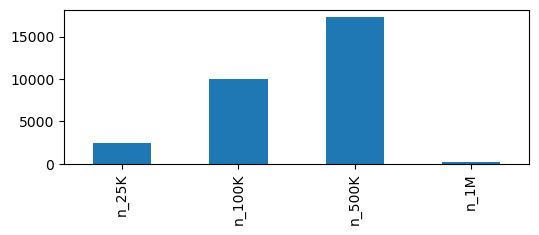

In [79]:
plt.figure(figsize=(6,2))
df_view['x'].plot(kind='bar')
plt.show()

In [81]:
dfcs = (df25K, df100K, df500K, df1M)

In [83]:
k = 0
data_v1 = []
for i_dfs in dfcs:
    print('class_ :', k+1)
    d_v1 = []
    for c1 in hb_cols1:
        print(i_dfs[c1].value_counts()/i_dfs.shape[0])
        #print(i_dfs[c1].value_counts().values[0]/i_dfs.shape[0])
        d_v1.append(i_dfs[c1].value_counts().values[1]/i_dfs.shape[0])
        j += 1
    data_v1.append(d_v1)
    k += 1

class_ : 1
hb1
0    0.653582
1    0.346418
Name: count, dtype: float64
hb1
0    0.653582
1    0.346418
Name: count, dtype: float64
hb3
0    0.712667
1    0.287333
Name: count, dtype: float64
hb4
0    0.760826
1    0.239174
Name: count, dtype: float64
hb5
0    0.718333
1    0.281667
Name: count, dtype: float64
hb6
0    0.669769
1    0.330231
Name: count, dtype: float64
class_ : 2
hb1
0    0.75556
1    0.24444
Name: count, dtype: float64
hb1
0    0.75556
1    0.24444
Name: count, dtype: float64
hb3
0    0.765034
1    0.234966
Name: count, dtype: float64
hb4
0    0.753565
1    0.246435
Name: count, dtype: float64
hb5
0    0.726937
1    0.273063
Name: count, dtype: float64
hb6
0    0.710183
1    0.289817
Name: count, dtype: float64
class_ : 3
hb1
0    0.530643
1    0.469357
Name: count, dtype: float64
hb1
0    0.530643
1    0.469357
Name: count, dtype: float64
hb3
0    0.5466
1    0.4534
Name: count, dtype: float64
hb4
0    0.547641
1    0.452359
Name: count, dtype: float64
hb5
0    0.5276

In [85]:
months = ['APR', 'MAY', 'JUN', 'JULY', 'AUG', 'SEPT']

In [87]:
data_v1 = np.array(data_v1)
print(data_v1.shape)

(4, 6)


In [89]:
df_1 = pd.DataFrame({'c_1': data_v1[0,:]})
df_1.index = months
df_1['c_2'] = data_v1[1,:]
df_1['c_3'] = data_v1[2,:]
df_1['c_4'] = data_v1[3,:]
df_1

,c_1,c_2,c_3,c_4
APR,0.346418,0.244440,0.469357,0.451456
MAY,0.346418,0.244440,0.469357,0.451456
JUN,0.287333,0.234966,0.453400,0.398058
JULY,0.239174,0.246435,0.452359,0.441748
AUG,0.281667,0.273063,0.472306,0.451456
SEPT,0.330231,0.289817,0.491963,0.470874


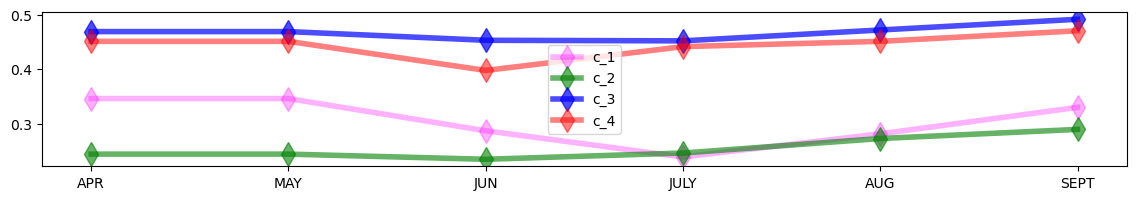

In [91]:
plt.figure(figsize=(14,2))
df_1.c_1.plot(kind='line', alpha=0.3, color='magenta', linewidth=4, marker='d', markersize=12)
df_1.c_2.plot(kind='line', alpha=0.6, color='green', linewidth=4, marker='d', markersize=12)
df_1.c_3.plot(kind='line', alpha=0.7, color='blue', linewidth=4, marker='d', markersize=12)
df_1.c_4.plot(kind='line', alpha=0.5, color='red', linewidth=4, marker='d', markersize=12)
plt.legend()
plt.show()

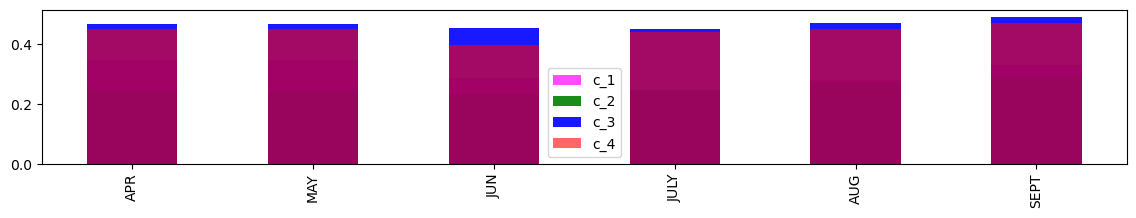

In [93]:
plt.figure(figsize=(14,2))
df_1.c_1.plot(kind='bar', alpha=0.7, color='magenta')
df_1.c_2.plot(kind='bar', alpha=0.9, color='green')
df_1.c_3.plot(kind='bar', alpha=0.9, color='blue')
df_1.c_4.plot(kind='bar', alpha=0.6, color='red')
plt.legend()
plt.show()